# Create plots for Figure 7

In [1]:
# Import necessary libraries
from __future__ import division, print_function, unicode_literals

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.usetex'] = False

import tensorflow as tf
import numpy as np
from functools import partial
import glob, os
import pickle
import copy
from PDEsolvers import HeatEqn_FT

In [2]:
# User inputs
data_name = 'Heat_Eqn_exp29'  # Prefix of data files
folder_name = 'Heat_exp29c/'  # Folder to be created for saved output

In [3]:
# Find the model with lowest validation error
import math

def BestErrorFile(folder_name):

    filename_best = ''
    best_error = 10**6

    current_dir = os.getcwd()
    os.chdir("./" + folder_name)
    for file in glob.glob("*.pkl"):
        with open(file, 'rb') as f:
            params = pickle.load(f)
            if not math.isnan(params['minRegTest']):
                if params['minRegTest'] < best_error:
                    filename_best = file
                    best_error = params['minRegTest']
    os.chdir(current_dir)

    return filename_best

pkl_file = folder_name + BestErrorFile(folder_name)

with open(pkl_file, 'rb') as f:
     params = pickle.load(f)

params['model_restore_path'] = params['model_path']
print(pkl_file)
print(params['minTest'])
print(params['minTrain'])

Heat_exp29c/Heat_Eqn_exp29_2019_08_04_05_22_13_599012_model.pkl
0.0710781492292881
0.06387144327163696


In [4]:
# Get all the needed things from the network

tf.reset_default_graph()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(params['model_path']+'.meta')
    saver.restore(sess, params['model_path'])
    
    L_mat = sess.run(tf.get_default_graph().get_tensor_by_name("dynamics/L:0"))
    IFT = sess.run(tf.get_default_graph().get_tensor_by_name("decoder_inner/IFT:0"))

INFO:tensorflow:Restoring parameters from ./Heat_exp29c/Heat_Eqn_exp29_2019_08_04_05_22_13_599012_model.ckpt


In [5]:
# Calculate eigenvalues and eigenvectors
lam, V = np.linalg.eig(L_mat)
lam = np.log(lam)
ind = np.argsort(lam)
ind = np.flip(ind,0)
lam = np.sort(lam)
lam = np.flip(lam,0)
network_lam = lam/params['delta_t']
print(lam/params['delta_t'])

[ 2.8610129e-03 -1.0000083e+00 -1.0012273e+00 -4.0001421e+00
 -4.0069337e+00 -9.0014553e+00 -9.0015297e+00 -1.6016428e+01
 -1.6016998e+01 -2.4997129e+01 -2.5010124e+01 -3.5992432e+01
 -3.5995045e+01 -4.8951012e+01 -4.9028839e+01 -6.3908646e+01
 -6.4093338e+01 -8.0977509e+01 -8.1173203e+01 -1.0002786e+02
 -1.0004730e+02]


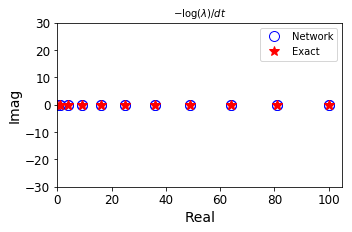

In [6]:
exact_lam = 0*lam

for k in np.arange(10):
    exact_lam[2*k+1:2*k+3] = [-(k+1)**2,-(k+1)**2]

plt.figure(figsize=(5,3.33))
Network, = plt.plot(-np.real(network_lam),np.imag(network_lam),'ob',markersize=10,markerfacecolor="None")
Exact, = plt.plot(-np.real(exact_lam),np.imag(exact_lam),'*r',markersize=10)
plt.ylim(-30,30)
plt.xlim(0,105)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.title('$-\log(\lambda)/dt$',fontsize=10)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.legend([Network,Exact],['Network','Exact'],fontsize=10)
plt.tight_layout()
plt.show()

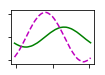

In [7]:
# Plot eigenvectors for a particular wavenumber
k = 1

x_pts = np.linspace(-np.pi,np.pi,129)
x_pts = x_pts[0:128]

f = V.T.dot(IFT)
f = np.real(f)

plt.figure(figsize=(1.5,1))
plt.plot(x_pts,f[ind[2*k-1],:],'-g',linewidth=1.5)
plt.plot(x_pts,f[ind[2*k],:],'--m',linewidth=1.5)
plt.xticks([-3,0,3], ['','',''])
plt.yticks([-0.1,0,0.1],['','',''])
plt.show()

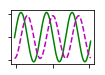

In [8]:
# Plot eigenvectors for a particular wavenumber
k = 3

x_pts = np.linspace(-np.pi,np.pi,129)
x_pts = x_pts[0:128]

f = V.T.dot(IFT)
f = np.real(f)

plt.figure(figsize=(1.5,1))
plt.plot(x_pts,f[ind[2*k-1],:],'-g',linewidth=1.5)
plt.plot(x_pts,f[ind[2*k],:],'--m',linewidth=1.5)
plt.xticks([-3,0,3], ['','',''])
plt.yticks([-0.25,0,0.25],['','',''])
plt.show()

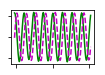

In [9]:
# Plot eigenvectors for a particular wavenumber
k = 8

x_pts = np.linspace(-np.pi,np.pi,129)
x_pts = x_pts[0:128]

f = V.T.dot(IFT)
f = np.real(f)

plt.figure(figsize=(1.5,1))
plt.plot(x_pts,f[ind[2*k-1],:],'-g',linewidth=1.5)
plt.plot(x_pts,f[ind[2*k],:],'--m',linewidth=1.5)
plt.xticks([-3,0,3], ['','',''])
plt.yticks([-0.5,0,0.5],['','',''])
plt.show()